In [1]:
import numpy as np
import pandas as pd
import os 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("evaluation_ids.csv")
metadata = pd.read_csv("metadata.csv")

There are 6812820 citeseq samples in the evaluation set
1007300 13176
3926020 27678 7: 874580 4: 1096480 3: 908320 2: 1046640 
863940  31800 all from day 7
1015560 32606

In [3]:
eval_df = pd.merge(df, metadata, how='left',on='cell_id')

In [4]:
Citeseq_df = eval_df[eval_df["technology"] == 'citeseq']

In [5]:
cite_df = Citeseq_df.drop(['cell_id', 'row_id', 'technology'], axis = 1)

In [6]:
cite_df['donor'] = cite_df['donor'].apply(lambda x: 1 if x == 13176 else x)
cite_df['donor'] = cite_df['donor'].apply(lambda x: 2 if x == 27678 else x)
cite_df['donor'] = cite_df['donor'].apply(lambda x: 3 if x == 31800 else x)
cite_df['donor'] = cite_df['donor'].apply(lambda x: 4 if x == 32606 else x)

In [7]:
day = cite_df.set_index("gene_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor = cite_df.set_index("gene_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type = cite_df.set_index("gene_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

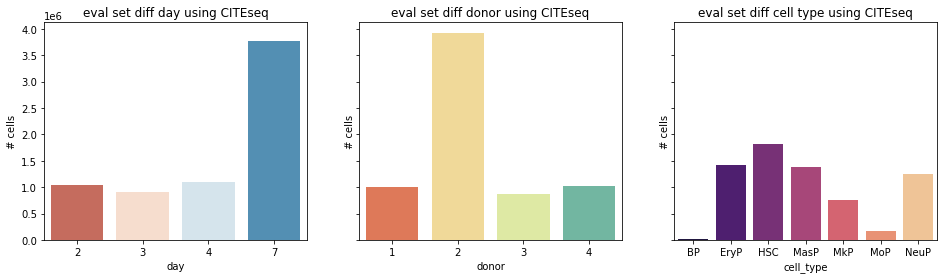

In [8]:
f, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)
sns.barplot(x = "day", y="# cells", data = day, palette="RdBu", ax = axs[0])
axs[0].set_title("eval set diff day using CITEseq")
sns.barplot(x = "donor", y="# cells", data = donor, palette="Spectral", ax = axs[1])
axs[1].set_title("eval set diff donor using CITEseq")
sns.barplot(x = "cell_type", y="# cells", data = cell_type, palette="magma", ax = axs[2])
axs[2].set_title("eval set diff cell type using CITEseq")

f.savefig('./image/1.1.png')

## Day Analyze

In [9]:
day_cell_type = cite_df.set_index("gene_id")[["day", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

day_cell_type_2 = day_cell_type[day_cell_type['day'] == 2]
day_cell_type_3= day_cell_type[day_cell_type['day'] == 3]
day_cell_type_4 = day_cell_type[day_cell_type['day'] == 4]
day_cell_type_7 = day_cell_type[day_cell_type['day'] == 7]

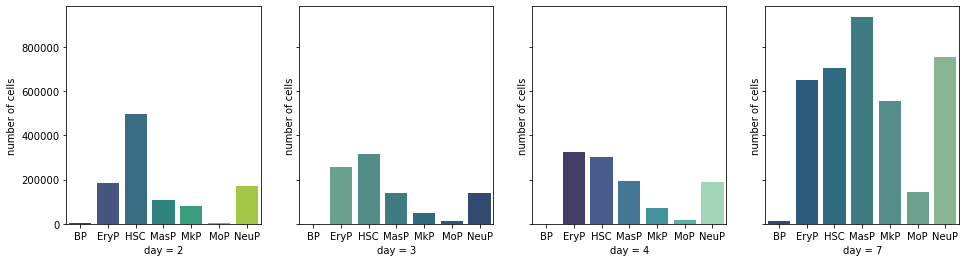

In [10]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
sns.barplot(x=day_cell_type_2['cell_type'], y=day_cell_type_2['# cells'], palette="viridis", ax=ax1)
ax1.set_xlabel("day = 2")
ax1.set_ylabel("number of cells")

sns.barplot(x=day_cell_type_3['cell_type'], y=day_cell_type_3['# cells'], palette="crest", ax=ax2)
ax2.set_xlabel("day = 3")
ax2.set_ylabel("number of cells")

sns.barplot(x=day_cell_type_4['cell_type'], y=day_cell_type_4['# cells'], palette="mako", ax=ax3)
ax3.set_xlabel("day = 4")
ax3.set_ylabel("number of cells")

sns.barplot(x=day_cell_type_7['cell_type'], y=day_cell_type_7['# cells'], palette="crest_r", ax=ax4)
ax4.set_xlabel("day = 7")
ax4.set_ylabel("number of cells")

f.savefig('./image/2.1.0.png')

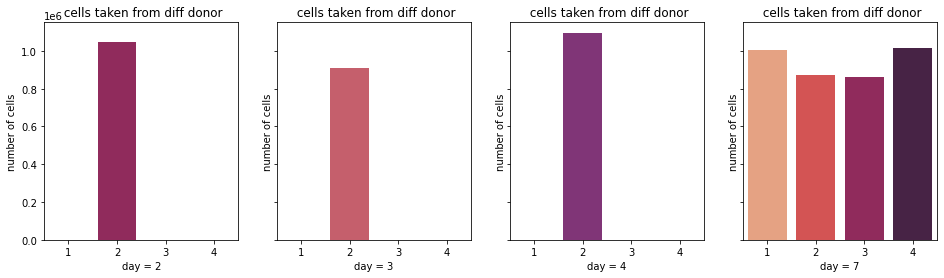

In [11]:
day_donor = cite_df.set_index("gene_id")[["day", 'donor']].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

day_donor_2 = day_donor[day_donor['day'] == 2]
day_donor_3 = day_donor[day_donor['day'] == 3]
day_donor_4 = day_donor[day_donor['day'] == 4]
day_donor_7 = day_donor[day_donor['day'] == 7]
df_empty_2 = pd.DataFrame({'day': [3, 4, 7],
                    'donor' : [1, 3, 4],
                    '# cells' : [0 , 0, 0]})

day_donor_2 = pd.concat([day_donor_2, df_empty_2], ignore_index = True, axis = 0)
day_donor_3 = pd.concat([day_donor_3, df_empty_2], ignore_index = True, axis = 0)
day_donor_4 = pd.concat([day_donor_4, df_empty_2], ignore_index = True, axis = 0)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
sns.barplot(x=day_donor_2['donor'], y=day_donor_2['# cells'], palette="rocket", ax=ax1)
ax1.set_xlabel("day = 2")
ax1.set_ylabel("number of cells")
ax1.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_3['donor'], y=day_donor_3['# cells'], palette="flare", ax=ax2)
ax2.set_xlabel("day = 3")
ax2.set_ylabel("number of cells")
ax2.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_4['donor'], y=day_donor_4['# cells'], palette="magma", ax=ax3)
ax3.set_xlabel("day = 4")
ax3.set_ylabel("number of cells")
ax3.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_7['donor'], y=day_donor_7['# cells'], palette="rocket_r", ax=ax4)
ax4.set_xlabel("day = 7")
ax4.set_ylabel("number of cells")
ax4.set_title(" cells taken from diff donor")
f.savefig('./image/2.1.1.png')

## Donor Analyze

In [12]:
donor_cell_type = cite_df.set_index("gene_id")[["donor", 'cell_type']].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

In [13]:
donor_cell_type_1 = donor_cell_type[donor_cell_type['donor'] == 1]
donor_cell_type_2 = donor_cell_type[donor_cell_type['donor'] == 2]
donor_cell_type_3 = donor_cell_type[donor_cell_type['donor'] == 3]
donor_cell_type_4 = donor_cell_type[donor_cell_type['donor'] == 4]

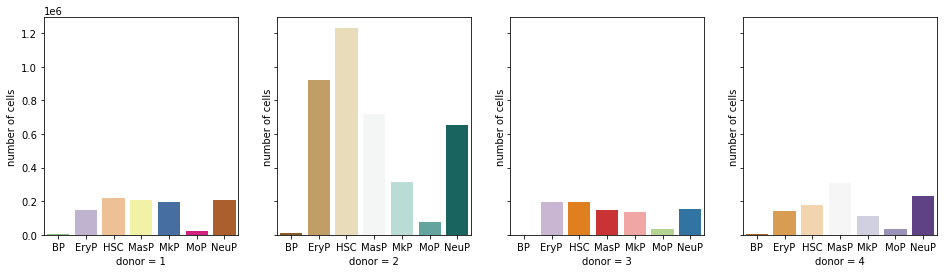

In [14]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
sns.barplot(x=donor_cell_type_1['cell_type'], y=donor_cell_type_1['# cells'], palette='Accent', ax=ax1)
ax1.set_xlabel("donor = 1")
ax1.set_ylabel("number of cells")

sns.barplot(x=donor_cell_type_2['cell_type'], y=donor_cell_type_2['# cells'], palette="BrBG", ax=ax2)
ax2.set_xlabel("donor = 2")
ax2.set_ylabel("number of cells")

sns.barplot(x=donor_cell_type_3['cell_type'], y=donor_cell_type_3['# cells'], palette="Paired_r", ax=ax3)
ax3.set_xlabel("donor = 3")
ax3.set_ylabel("number of cells")

sns.barplot(x=donor_cell_type_4['cell_type'], y=donor_cell_type_4['# cells'], palette="PuOr", ax=ax4)
ax4.set_xlabel("donor = 4")
ax4.set_ylabel("number of cells")

f.savefig('./image/2.2.0.png')